<a href="https://colab.research.google.com/github/dariRusAG/Modern-programming-languages/blob/main/%D0%A2%D0%BE%D0%BA%D0%B5%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%90%D0%B3%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная 3

Токенизация:
1. Разбить предложение на токены.
2. Убрать из токенов стоп слова. 
3. Найти часто встречающиеся токены и вывести 10 штук на графике
4. Посчитать количество существительных и прилагательных.
5. По самым встречающимся словам, взять все предложения с этими словами и вывести их в порядке появления в тексте.
6. Получить настроение текста.

## Импорт библиотек

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

from nltk import word_tokenize, sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


## Текст "ShortStory"

In [ ]:
text = '''Once upon a time there lived a young farmer. He worked very hard but was very poor. One day when he was far from home in the forest, an old woman looking like a peasant came up to him and said, «I know you work very hard, and all for nothing. I will give you a magic ring! It will make you rich, and your work won’t be in vain. When you turn the ring on your finger and say what you wish to have, you’ll have it at once! But there is only one wish in the ring, so think carefully before you wish». 
The astonished farmer took the ring given to him by the peasant woman, and went home. In evening he came to a big city. There he went to a merchant and showed him the magic ring. When the merchant heard the astonishing story, he thought of a plan. He invited the farmer to stay in his house for the night. At night he came up to the sleeping peasant, carefully took the ring off the man’s finger, and put on another ring, which looked exactly like the one he had taken off. 
In the morning when the farmer had gone away, the merchant ran into his shop, shut the door, and said while turning the ring on his finger, «I wish to have a hundred thousand pieces of gold». And down they came, on his head, shoulders, and arms, like a rain of gold! The frightened merchant tried to get out of the shop, but in vain. In a few minutes he was dead. 
When the farmer returned home, he showed the ring to his wife. «Take a look at this ring», he said. «It’s a magic ring! It will make us happy». 
The astonished woman could hardly say a word «Let’s try. Maybe the ring will bring us more land», she said at last. 
«We must be careful about our wish. Don’t forget there’s only one thing that we may ask for», he explained. «Let’s better work hard for another year, and we’ll have more land». 
So they worked as hard as they could and got enough money to buy the land they wished to have. 
Then the farmer’s wife thought of asking for a cow and a horse. They discussed the matter more than once. «My good wife», — said the farmer, — «we shall get a horse and a cow without the ring». They went on working hard for a whole year and again bought the things they wished to have. 
«What happy people we are!» said the farmer. 
«I don’t understand you», answered his wife angrily. «There’s nothing in the world that we can’t have, and still we spend days and nights working as hard as before, because you don’t want to use your magic ring!». 
Thirty, then forty years had gone by. The farmer and his wife had grown old. Their hair became as white as snow. They were happy and had everything they wanted. Their ring was still there. Although it was not a magic ring, it had made them happy.
'''

## 1. Разбить предложение на токены.

In [ ]:
tokens = word_tokenize(text)
print('Количество токенов:', len(tokens))
print(tokens)

Количество токенов: 648
['Once', 'upon', 'a', 'time', 'there', 'lived', 'a', 'young', 'farmer', '.', 'He', 'worked', 'very', 'hard', 'but', 'was', 'very', 'poor', '.', 'One', 'day', 'when', 'he', 'was', 'far', 'from', 'home', 'in', 'the', 'forest', ',', 'an', 'old', 'woman', 'looking', 'like', 'a', 'peasant', 'came', 'up', 'to', 'him', 'and', 'said', ',', '«', 'I', 'know', 'you', 'work', 'very', 'hard', ',', 'and', 'all', 'for', 'nothing', '.', 'I', 'will', 'give', 'you', 'a', 'magic', 'ring', '!', 'It', 'will', 'make', 'you', 'rich', ',', 'and', 'your', 'work', 'won', '’', 't', 'be', 'in', 'vain', '.', 'When', 'you', 'turn', 'the', 'ring', 'on', 'your', 'finger', 'and', 'say', 'what', 'you', 'wish', 'to', 'have', ',', 'you', '’', 'll', 'have', 'it', 'at', 'once', '!', 'But', 'there', 'is', 'only', 'one', 'wish', 'in', 'the', 'ring', ',', 'so', 'think', 'carefully', 'before', 'you', 'wish', '»', '.', 'The', 'astonished', 'farmer', 'took', 'the', 'ring', 'given', 'to', 'him', 'by', 'the

## 2. Убрать из токенов стоп слова. 

In [ ]:
# Предварительная обработка массива токенизированного текста
stop_words = nltk.corpus.stopwords.words('english')
remove_tokens = list(punctuation + '’«»—') + stop_words

# Приведение в нижний регистр и удаление знаков препинаний и стоп слов
norm_tokens = [word.lower() for word in tokens if word.lower() not in remove_tokens]

# Оставляет слова, длина которых больше двух символов
norm_tokens = [word for word in norm_tokens if len(word) > 2]

print('Количество токенов:', len(norm_tokens))
print('Обработанный массив токенов:', norm_tokens)

Количество токенов: 242
Обработанный массив токенов: ['upon', 'time', 'lived', 'young', 'farmer', 'worked', 'hard', 'poor', 'one', 'day', 'far', 'home', 'forest', 'old', 'woman', 'looking', 'like', 'peasant', 'came', 'said', 'know', 'work', 'hard', 'nothing', 'give', 'magic', 'ring', 'make', 'rich', 'work', 'vain', 'turn', 'ring', 'finger', 'say', 'wish', 'one', 'wish', 'ring', 'think', 'carefully', 'wish', 'astonished', 'farmer', 'took', 'ring', 'given', 'peasant', 'woman', 'went', 'home', 'evening', 'came', 'big', 'city', 'went', 'merchant', 'showed', 'magic', 'ring', 'merchant', 'heard', 'astonishing', 'story', 'thought', 'plan', 'invited', 'farmer', 'stay', 'house', 'night', 'night', 'came', 'sleeping', 'peasant', 'carefully', 'took', 'ring', 'man', 'finger', 'put', 'another', 'ring', 'looked', 'exactly', 'like', 'one', 'taken', 'morning', 'farmer', 'gone', 'away', 'merchant', 'ran', 'shop', 'shut', 'door', 'said', 'turning', 'ring', 'finger', 'wish', 'hundred', 'thousand', 'pieces

## 3. Найти часто встречающиеся токены и вывести 10 штук на графике

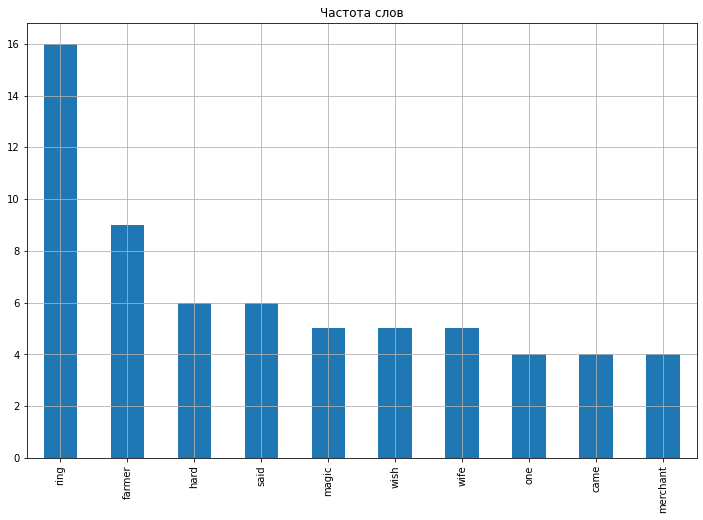

In [ ]:
# Частотное распределение всех слов в тексте
fdist = nltk.FreqDist(norm_tokens)

# Введем параметр, чтобы вернуть список первых 10 элементов
fdist_most_common = dict(fdist.most_common(10))

plt_tokens = fdist_most_common.keys()
plt_frequencies = pd.Series(fdist_most_common.values())

plt.figure(figsize=(12, 8))

ax = plt_frequencies.plot(kind="bar")
ax.set_title("Частота слов")
ax.set_xticklabels(plt_tokens)
plt.grid()
plt.show()

## 4. Посчитать количество существительных и прилагательных.

In [ ]:
# Подсчет количества повторений элементов
cnt = dict(Counter(word for key, word in pos_tag(norm_tokens)).items())

print('Количество существительных:', cnt['NN'])
print('Количество прилагательных:', cnt['JJ'])

Количество существительных: 76
Количество прилагательных: 38


## 5. По самым встречающимся словам, взять все предложения с этими словами и вывести их в порядке появления в тексте.

In [ ]:
sentences = sent_tokenize(text)

for token, count in fdist.most_common(10):
    result = [sent for sent in sentences if token in word_tokenize(sent)]
    print(token, result)

ring ['I will give you a magic ring!', 'When you turn the ring on your finger and say what you wish to have, you’ll have it at once!', 'But there is only one wish in the ring, so think carefully before you wish».', 'The astonished farmer took the ring given to him by the peasant woman, and went home.', 'There he went to a merchant and showed him the magic ring.', 'At night he came up to the sleeping peasant, carefully took the ring off the man’s finger, and put on another ring, which looked exactly like the one he had taken off.', 'In the morning when the farmer had gone away, the merchant ran into his shop, shut the door, and said while turning the ring on his finger, «I wish to have a hundred thousand pieces of gold».', 'When the farmer returned home, he showed the ring to his wife.', '«Take a look at this ring», he said.', '«It’s a magic ring!', 'Maybe the ring will bring us more land», she said at last.', '«My good wife», — said the farmer, — «we shall get a horse and a cow without

## 6. Получить настроение текста.

In [ ]:
print(SentimentIntensityAnalyzer().polarity_scores(text))

{'neg': 0.069, 'neu': 0.812, 'pos': 0.119, 'compound': 0.985}


### Настроение по предложениям

In [ ]:
for sentence in sentences:
  print(sentence)
  mood = SentimentIntensityAnalyzer().polarity_scores(sentence)
  
  for elem in sorted(mood):
    print('{0}: {1}'.format(elem, mood[elem]))
  print()

Once upon a time there lived a young farmer.
compound: 0.0
neg: 0.0
neu: 1.0
pos: 0.0

He worked very hard but was very poor.
compound: -0.7128
neg: 0.497
neu: 0.503
pos: 0.0

One day when he was far from home in the forest, an old woman looking like a peasant came up to him and said, «I know you work very hard, and all for nothing.
compound: 0.204
neg: 0.048
neu: 0.881
pos: 0.071

I will give you a magic ring!
compound: 0.0
neg: 0.0
neu: 1.0
pos: 0.0

It will make you rich, and your work won’t be in vain.
compound: 0.2023
neg: 0.171
neu: 0.61
pos: 0.22

When you turn the ring on your finger and say what you wish to have, you’ll have it at once!
compound: 0.4574
neg: 0.0
neu: 0.864
pos: 0.136

But there is only one wish in the ring, so think carefully before you wish».
compound: 0.6925
neg: 0.0
neu: 0.695
pos: 0.305

The astonished farmer took the ring given to him by the peasant woman, and went home.
compound: 0.3818
neg: 0.0
neu: 0.852
pos: 0.148

In evening he came to a big city.
co